In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.decomposition import PCA
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [50]:
df1 = pd.read_csv(r"C:\Users\91809\Desktop\Mental Fitness Tracker\mental-and-substance-use-as-share-of-disease -AI.csv")
df2 = pd.read_csv(r"C:\Users\91809\Desktop\Mental Fitness Tracker\prevalence-by-mental-and-substance-use-disorder _AI.csv")

In [51]:
df1

Entity Code  Year  \
0     Afghanistan  AFG  1990   
1     Afghanistan  AFG  1991   
2     Afghanistan  AFG  1992   
3     Afghanistan  AFG  1993   
4     Afghanistan  AFG  1994   
...           ...  ...   ...   
6835     Zimbabwe  ZWE  2015   
6836     Zimbabwe  ZWE  2016   
6837     Zimbabwe  ZWE  2017   
6838     Zimbabwe  ZWE  2018   
6839     Zimbabwe  ZWE  2019   

      DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                              1.696670                                                
1                                              1.734281                                                
2                                              1.791189                                                
3                                              1.776779                                                
4                                              1.712986                                                
...                                                 ...                                                
6835                                           2.193166                                                
6836                                           2.279813                                                
6837                                           2.364265                                                
6838                                           2.472949                                                
6839                                           2.525892                                                

[6840 rows x 4 columns]

In [52]:
df2

Entity Code  Year  \
0     Afghanistan  AFG  1990   
1     Afghanistan  AFG  1991   
2     Afghanistan  AFG  1992   
3     Afghanistan  AFG  1993   
4     Afghanistan  AFG  1994   
...           ...  ...   ...   
6835     Zimbabwe  ZWE  2015   
6836     Zimbabwe  ZWE  2016   
6837     Zimbabwe  ZWE  2017   
6838     Zimbabwe  ZWE  2018   
6839     Zimbabwe  ZWE  2019   

      Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                              0.228979                          
1                                              0.228120                          
2                                              0.227328                          
3                                              0.226468                          
4                                              0.225567                          
...                                                 ...                          
6835                                           0.209359                          
6836                                           0.209979                          
6837                                           0.210631                          
6838                                           0.211237                          
6839                                           0.211969                          

      Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                              0.721207                             
1                                              0.719952                             
2                                              0.718418                             
3                                              0.717452                             
4                                              0.717012                             
...                                                 ...                             
6835                                           0.560882                             
6836                                           0.561768                             
6837                                           0.562612                             
6838                                           0.563283                             
6839                                           0.563820                             

      Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                              0.131001                             
1                                              0.126395                             
2                                              0.121832                             
3                                              0.117942                             
4                                              0.114547                             
...                                                 ...                             
6835                                           0.099610                             
6836                                           0.100821                             
6837                                           0.101671                             
6838                                           0.102398                             
6839                                           0.102902                             

      Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                              4.835127                              
1                                              4.821765                              
2                                              4.801434                              
3                                              4.789363                              
4                                              4.784923                              
...                                                 ...                            

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 4 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Code                                                                                             6150 non-null   object 
 2   Year                                                                                             6840 non-null   int64  
 3   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  6840 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 213.9+ KB


In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Entity                                                                            6840 non-null   object 
 1   Code                                                                              6150 non-null   object 
 2   Year                                                                              6840 non-null   int64  
 3   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)          6840 non-null   float64
 4   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)       6840 non-null   float64
 5   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)       6840 non-null   float64
 6   

In [55]:
df1.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)      0
dtype: int64

In [56]:
df2.isnull().sum()

Entity                                                                                0
Code                                                                                690
Year                                                                                  0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)              0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)           0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)           0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)          0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)         0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)       0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)      0
dtype: int64

In [57]:
df1.describe()

Year  \
count  6840.000000   
mean   2004.500000   
std       8.656074   
min    1990.000000   
25%    1997.000000   
50%    2004.500000   
75%    2012.000000   
max    2019.000000   

       DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
count                                        6840.000000                                                
mean                                            4.818062                                                
std                                             2.294029                                                
min                                             0.215647                                                
25%                                             3.006507                                                
50%                                             4.679177                                                
75%                                             6.387488                                                
max                                            13.761517

In [58]:
df2.describe()

Year  \
count  6840.000000   
mean   2004.500000   
std       8.656074   
min    1990.000000   
25%    1997.000000   
50%    2004.500000   
75%    2012.000000   
max    2019.000000   

       Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
count                                        6840.000000                          
mean                                            0.281167                          
std                                             0.047561                          
min                                             0.191621                          
25%                                             0.255468                          
50%                                             0.287456                          
75%                                             0.304760                          
max                                             0.506018                          

       Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
count                                        6840.000000                             
mean                                            0.673891                             
std                                             0.258594                             
min                                             0.189344                             
25%                                             0.539791                             
50%                                             0.591893                             
75%                                             0.897248                             
max                                             1.676204                             

       Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
count                                        6840.000000                             
mean                                            0.211062                             
std                                             0.152559                             
min                                             0.045425                             
25%                                             0.099857                             
50%                                             0.154143                             
75%                                             0.276891                             
max                                             1.136541                             

       Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
count                                        6840.000000                              
mean                                            4.327525                              
std                                             1.177961                              
min                                             1.974823                              
25%                                             3.567064                              
50%                                             4.094443                              
75%                                             4.797286                              
max                                             9.015948                              

       Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
count                                        6840.000000                               
mean                                            0.746708                               
std                                             0.463026                               
min                                             0.225471                               
25%                                             0.423502                               
50%                                             0.646050                               
75%                                             0.890013                               
max                          

In [59]:
#fill missing valuse in df1 and df2 with their mean values
numeric_columns = df1.select_dtypes(include=[np.number]).columns
df1[numeric_columns] = df1[numeric_columns].fillna(df1[numeric_columns].mean())

numeric_columns = df2.select_dtypes(include=[np.number]).columns
df2[numeric_columns] = df2[numeric_columns].fillna(df2[numeric_columns].mean())


In [60]:
data = pd.merge(df1,df2)

In [61]:
data

Entity Code  Year  \
0     Afghanistan  AFG  1990   
1     Afghanistan  AFG  1991   
2     Afghanistan  AFG  1992   
3     Afghanistan  AFG  1993   
4     Afghanistan  AFG  1994   
...           ...  ...   ...   
6835     Zimbabwe  ZWE  2015   
6836     Zimbabwe  ZWE  2016   
6837     Zimbabwe  ZWE  2017   
6838     Zimbabwe  ZWE  2018   
6839     Zimbabwe  ZWE  2019   

      DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  \
0                                              1.696670                                                 
1                                              1.734281                                                 
2                                              1.791189                                                 
3                                              1.776779                                                 
4                                              1.712986                                                 
...                                                 ...                                                 
6835                                           2.193166                                                 
6836                                           2.279813                                                 
6837                                           2.364265                                                 
6838                                           2.472949                                                 
6839                                           2.525892                                                 

      Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                              0.228979                          
1                                              0.228120                          
2                                              0.227328                          
3                                              0.226468                          
4                                              0.225567                          
...                                                 ...                          
6835                                           0.209359                          
6836                                           0.209979                          
6837                                           0.210631                          
6838                                           0.211237                          
6839                                           0.211969                          

      Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                              0.721207                             
1                                              0.719952                             
2                                              0.718418                             
3                                              0.717452                             
4                                              0.717012                             
...                                                 ...                             
6835                                           0.560882                             
6836                                           0.561768                             
6837                                           0.562612                             
6838                                           0.563283                             
6839                                           0.563820                             

      Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                              0.131001                             
1                                              0.126395                             
2                                              0.121832                             
3                  

In [62]:
data.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)      0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Pe

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 11 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Code                                                                                             6150 non-null   object 
 2   Year                                                                                             6840 non-null   int64  
 3   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  6840 non-null   float64
 4   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                         6840 non-null   float64
 5   Preval

In [64]:
data.describe()

Year  \
count  6840.000000   
mean   2004.500000   
std       8.656074   
min    1990.000000   
25%    1997.000000   
50%    2004.500000   
75%    2012.000000   
max    2019.000000   

       DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  \
count                                        6840.000000                                                 
mean                                            4.818062                                                 
std                                             2.294029                                                 
min                                             0.215647                                                 
25%                                             3.006507                                                 
50%                                             4.679177                                                 
75%                                             6.387488                                                 
max                                            13.761517                                                 

       Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
count                                        6840.000000                          
mean                                            0.281167                          
std                                             0.047561                          
min                                             0.191621                          
25%                                             0.255468                          
50%                                             0.287456                          
75%                                             0.304760                          
max                                             0.506018                          

       Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
count                                        6840.000000                             
mean                                            0.673891                             
std                                             0.258594                             
min                                             0.189344                             
25%                                             0.539791                             
50%                                             0.591893                             
75%                                             0.897248                             
max                                             1.676204                             

       Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
count                                        6840.000000                             
mean                                            0.211062                             
std                                             0.152559                             
min                                             0.045425                             
25%                                             0.099857                             
50%                                             0.154143                             
75%                                             0.276891                             
max                                             1.136541                             

       Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
count                                        6840.000000                              
mean                                            4.327525                              
std                                             1.177961                              
min                                             1.974823                              
25%                                             3.567064                              
50%                                     

In [65]:
data.drop('Code',axis = 1,inplace=True)

In [66]:
data.set_axis(['Country' , 'Year' , 'Mental_fitness' , 'Schizophrenia' , 'Bipolar_disorders' , 'Eating_disorders' , 'Anxiety_disorders' , 'Drug_use_disorders' , 'Depressive_disorders' , 'Alcohol_use_disorders'],axis ='columns' , inplace =True)

In [67]:
data

Country  Year  Mental_fitness  Schizophrenia  Bipolar_disorders  \
0     Afghanistan  1990        1.696670       0.228979           0.721207   
1     Afghanistan  1991        1.734281       0.228120           0.719952   
2     Afghanistan  1992        1.791189       0.227328           0.718418   
3     Afghanistan  1993        1.776779       0.226468           0.717452   
4     Afghanistan  1994        1.712986       0.225567           0.717012   
...           ...   ...             ...            ...                ...   
6835     Zimbabwe  2015        2.193166       0.209359           0.560882   
6836     Zimbabwe  2016        2.279813       0.209979           0.561768   
6837     Zimbabwe  2017        2.364265       0.210631           0.562612   
6838     Zimbabwe  2018        2.472949       0.211237           0.563283   
6839     Zimbabwe  2019        2.525892       0.211969           0.563820   

      Eating_disorders  Anxiety_disorders  Drug_use_disorders  \
0             0.131001           4.835127            0.454202   
1             0.126395           4.821765            0.447112   
2             0.121832           4.801434            0.441190   
3             0.117942           4.789363            0.435581   
4             0.114547           4.784923            0.431822   
...                ...                ...                 ...   
6835          0.099610           3.315701            0.599604   
6836          0.100821           3.324230            0.603658   
6837          0.101671           3.330569            0.608096   
6838          0.102398           3.317500            0.609065   
6839          0.102902           3.283934            0.610644   

      Depressive_disorders  Alcohol_use_disorders  
0                 5.125291               0.444036  
1                 5.116306               0.444250  
2                 5.106558               0.445501  
3                 5.100328               0.445958  
4                 5.099424               0.445779  
...                    ...                    ...  
6835              3.548613               1.734969  
6836              3.557508               1.689281  
6837              3.564138               1.651805  
6838              3.563141               1.686711  
6839              3.554571               1.776729  

[6840 rows x 10 columns]

In [68]:
data.size,data.shape

(68400, (6840, 10))

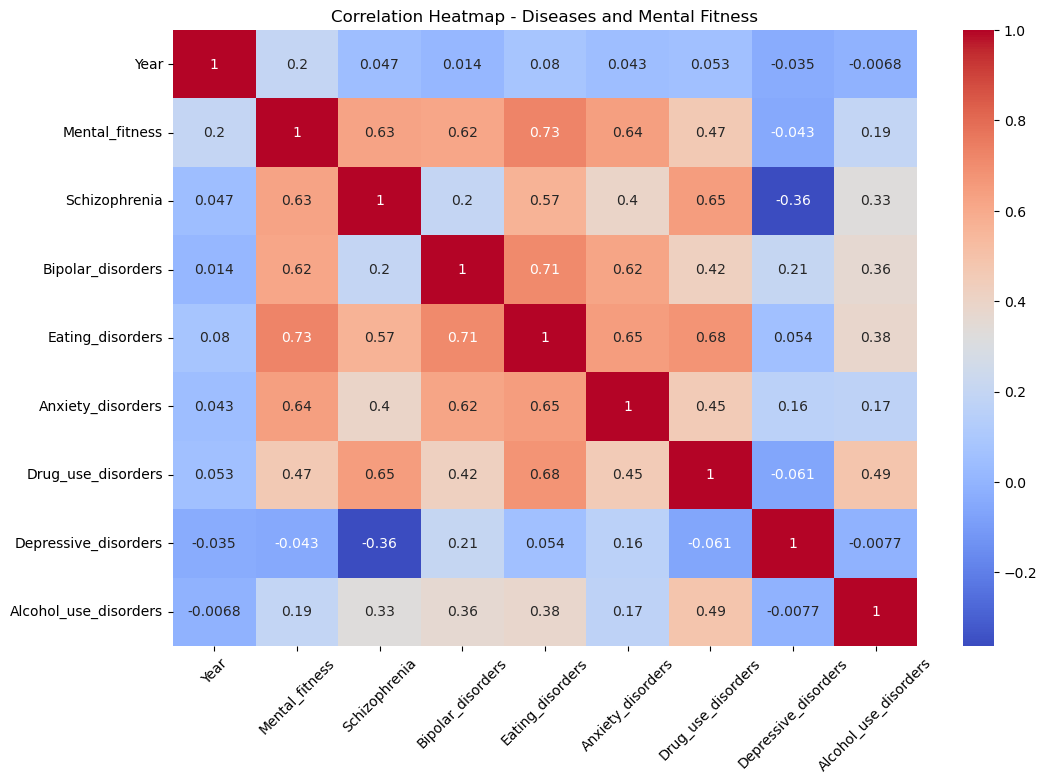

In [69]:
# Compute the correlation matrix
corr_matrix = data[['Year' , 
                    'Mental_fitness' , 
                    'Schizophrenia' , 
                    'Bipolar_disorders' , 
                    'Eating_disorders' , 
                    'Anxiety_disorders' , 
                    'Drug_use_disorders' , 
                    'Depressive_disorders' , 
                    'Alcohol_use_disorders'
                         
                        ]].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Diseases and Mental Fitness')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

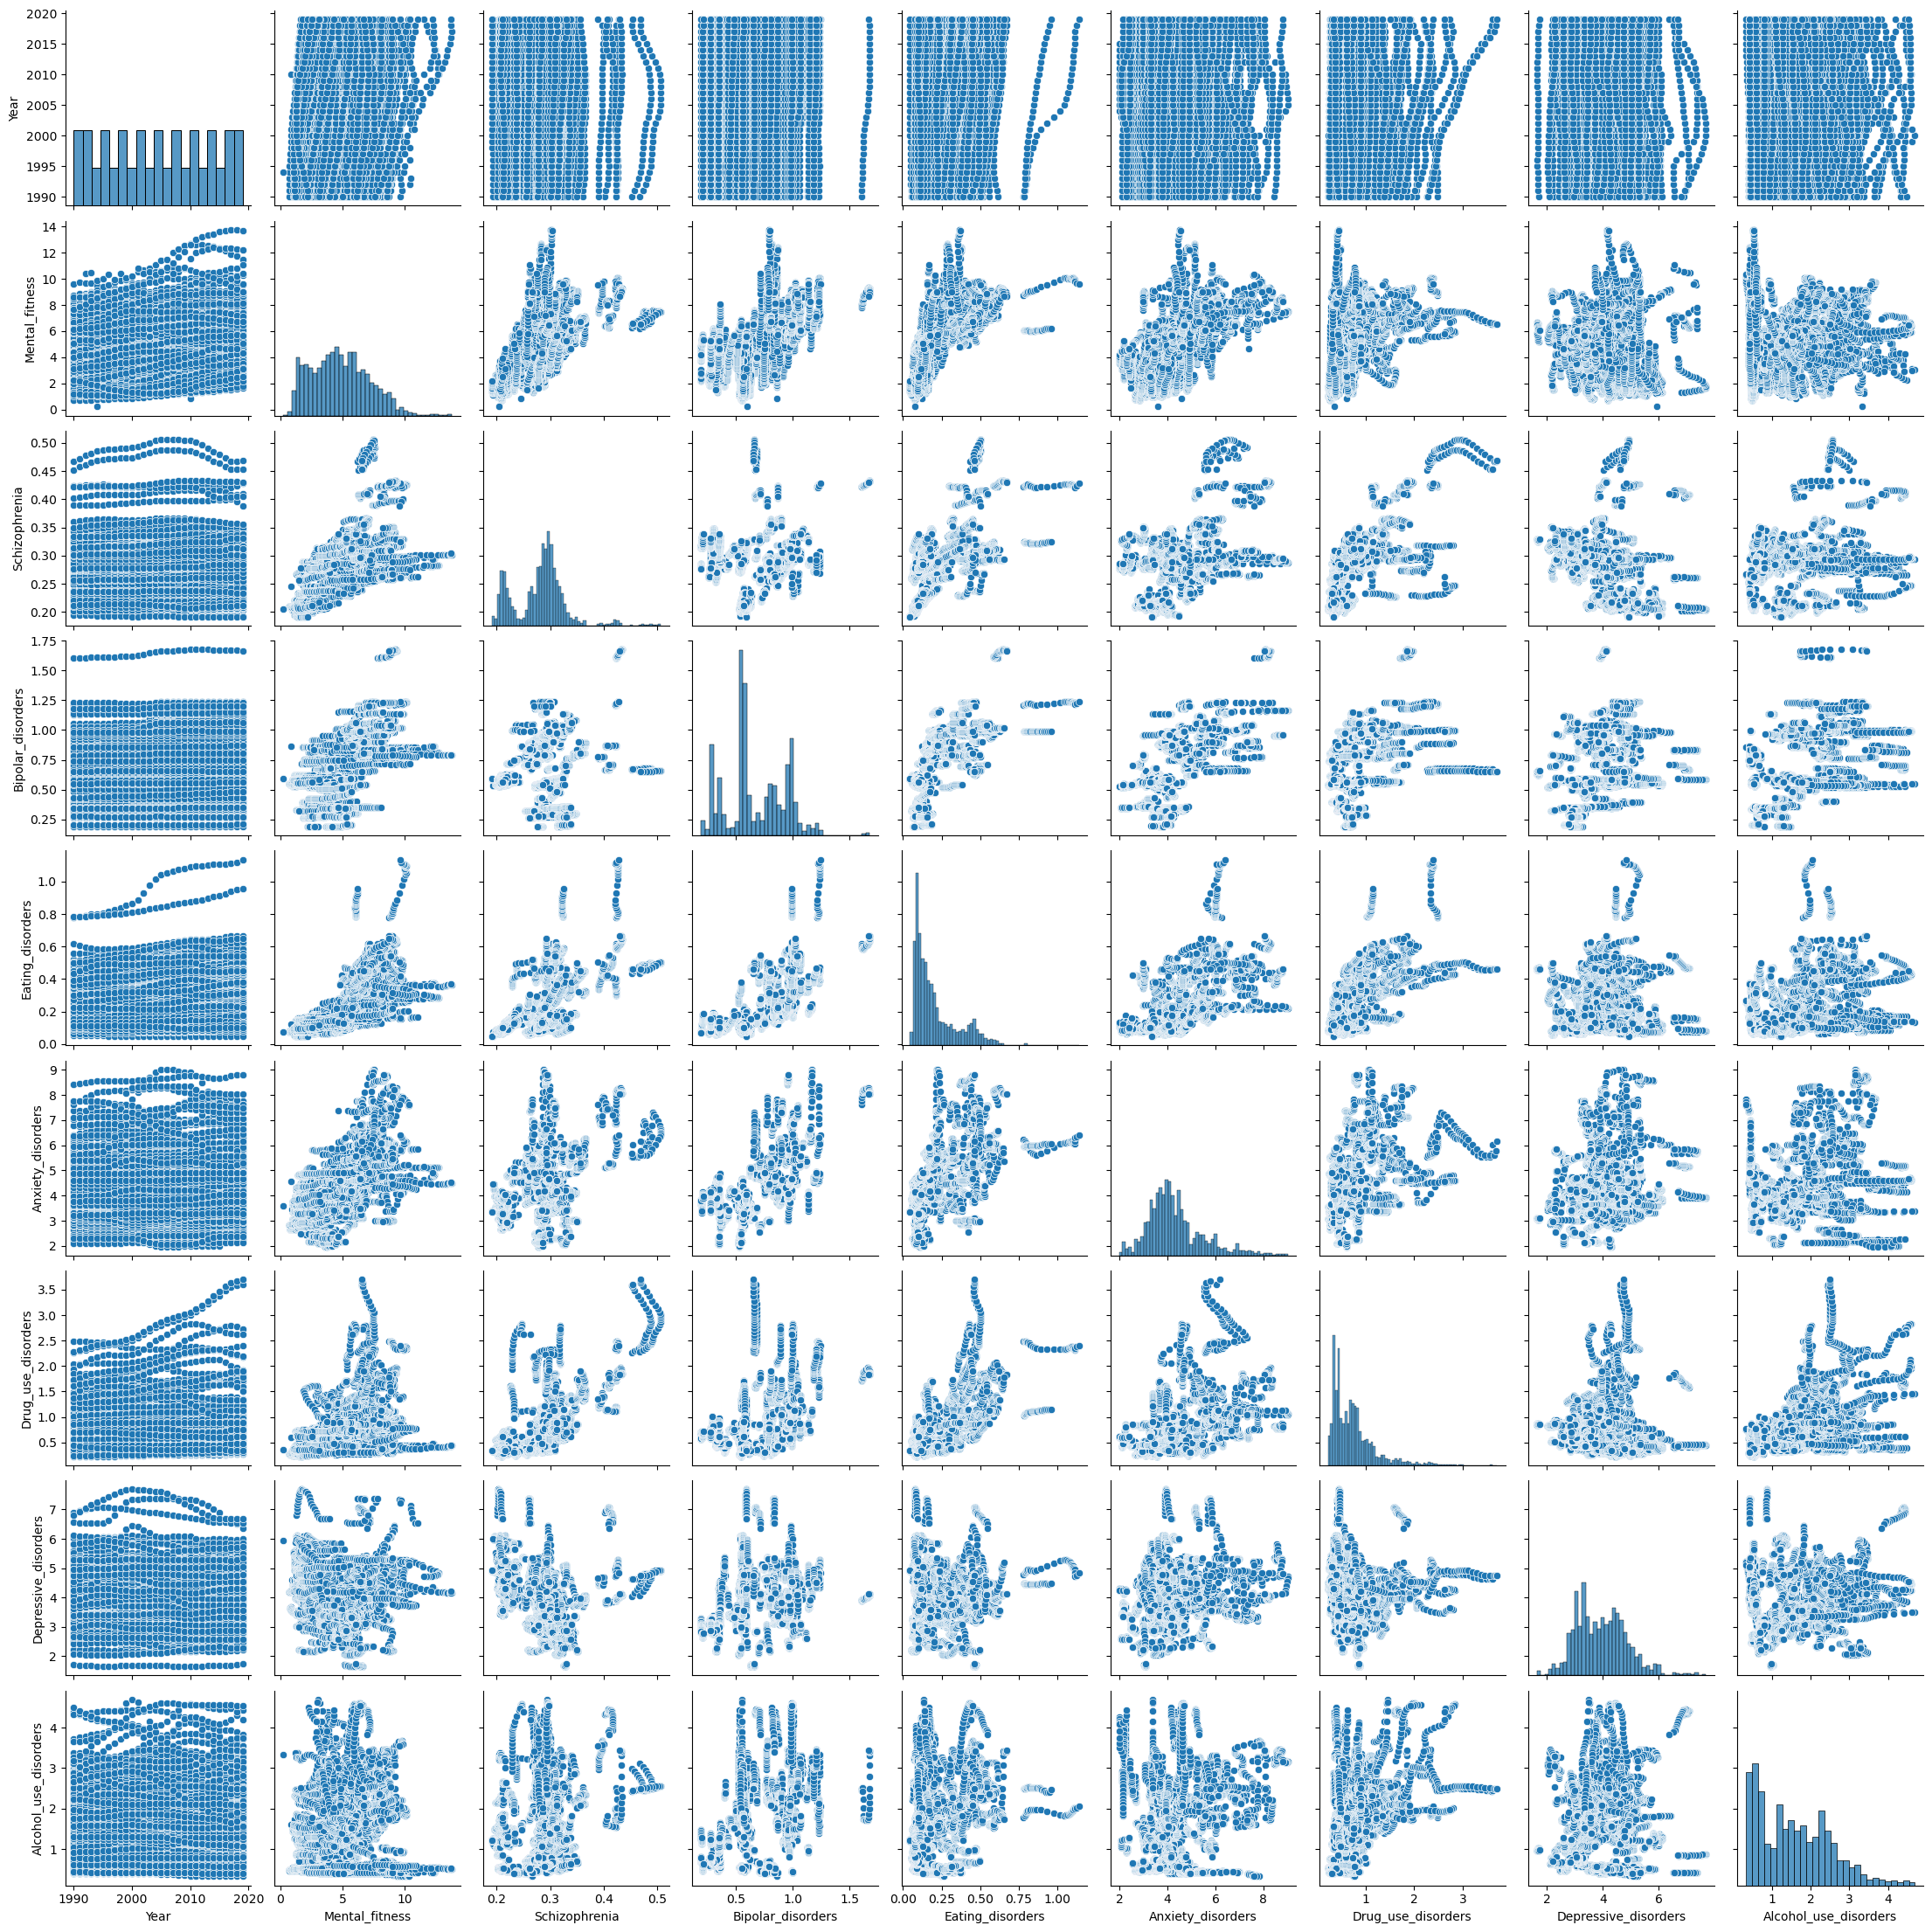

In [70]:
sns.pairplot(data)

In [71]:
mean = data['Mental_fitness'].mean()
mean

4.8180618117506135

In [72]:
fig = px.pie(data,values='Mental_fitness',names='Year')
fig.show()

In [73]:
fig = px.line(data,x='Year',y='Mental_fitness',color='Country',markers=True,color_discrete_sequence=['red','blue'],template='plotly_dark')
fig.show()

In [74]:
data.shape

(6840, 10)

In [75]:
X = data[['Schizophrenia' ,'Bipolar_disorders' , 
                    'Eating_disorders' , 
                    'Anxiety_disorders' , 
                    'Drug_use_disorders' , 
                    'Depressive_disorders' , 
                    'Alcohol_use_disorders']]

y = data['Mental_fitness']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
print("xtrain:" , X_train.shape)
print("xtest:" , X_test.shape)
print("ytrain:" , y_train.shape)
print("ytest:" , y_test.shape)

xtrain: (5472, 7)
xtest: (1368, 7)
ytrain: (5472,)
ytest: (1368,)


In [78]:
# Create a dictionary to store the model performance
model_performance = {}

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)
model_performance['0. Linear Regression'] = {'MSE': linear_mse, 'R-squared': linear_r2}

# Ridge Regression
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
model_performance['1. Ridge Regression'] = {'MSE': ridge_mse, 'R-squared': ridge_r2}

# Lasso Regression
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
model_performance['2. Lasso Regression'] = {'MSE': lasso_mse, 'R-squared': lasso_r2}

# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)
elastic_net_y_pred = elastic_net_model.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_y_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_y_pred)
model_performance['3. Elastic Net Regression'] = {'MSE': elastic_net_mse, 'R-squared': elastic_net_r2}

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
X_test_poly = poly_features.transform(X_test)
poly_y_pred = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, poly_y_pred)
poly_r2 = r2_score(y_test, poly_y_pred)
model_performance['4. Polynomial Regression'] = {'MSE': poly_mse, 'R-squared': poly_r2}

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_y_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)
model_performance['5. Decision Tree Regression'] = {'MSE': tree_mse, 'R-squared': tree_r2}

# Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_y_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_y_pred)
forest_r2 = r2_score(y_test, forest_y_pred)
model_performance['6. Random Forest Regression'] = {'MSE': forest_mse, 'R-squared': forest_r2}

# SVR (Support Vector Regression)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
model_performance['7. Support Vector Regression'] = {'MSE': svr_mse, 'R-squared': svr_r2}

# XGBoost Regression
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
model_performance['8. XGBoost Regression'] = {'MSE': xgb_mse, 'R-squared': xgb_r2}

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
model_performance['9. K-Nearest Neighbors Regression'] = {'MSE': knn_mse, 'R-squared': knn_r2}

# Bayesian Regression
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
bayesian_y_pred = bayesian_model.predict(X_test)
bayesian_mse = mean_squared_error(y_test, bayesian_y_pred)
bayesian_r2 = r2_score(y_test, bayesian_y_pred)
model_performance['10. Bayesian Regression'] = {'MSE': bayesian_mse, 'R-squared': bayesian_r2}

# Neural Network Regression
nn_model = MLPRegressor(max_iter=1000)
nn_model.fit(X_train, y_train)
nn_y_pred = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_y_pred)
nn_r2 = r2_score(y_test, nn_y_pred)
model_performance['11. Neural Network Regression'] = {'MSE': nn_mse, 'R-squared': nn_r2}

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
model_performance['12. Gradient Boosting Regression'] = {'MSE': gb_mse, 'R-squared': gb_r2}

# Gaussian Regression
gr_model = GaussianProcessRegressor()
gr_model.fit(X_train, y_train)
gr_y_pred = gr_model.predict(X_test)
gr_mse = mean_squared_error(y_test, gr_y_pred)
gr_r2 = r2_score(y_test, gr_y_pred)
model_performance['13 Gaussian Regression'] = {'MSE': gr_mse, 'R-squared': gr_r2}



# Print model performance
for model, performance in model_performance.items():
    print(f"Model: {model}")
    print("   Mean Squared Error (MSE):", performance['MSE'])
    print("   R-squared Score:", performance['R-squared'])
    print()

Model: 0. Linear Regression
   Mean Squared Error (MSE): 1.506172546193809
   R-squared Score: 0.7038976826127907

Model: 1. Ridge Regression
   Mean Squared Error (MSE): 1.5127375898932234
   R-squared Score: 0.7026070438622323

Model: 2. Lasso Regression
   Mean Squared Error (MSE): 3.1305674098334846
   R-squared Score: 0.3845537371325256

Model: 3. Elastic Net Regression
   Mean Squared Error (MSE): 3.093262193980327
   R-squared Score: 0.3918876650365126

Model: 4. Polynomial Regression
   Mean Squared Error (MSE): 0.8428057671756513
   R-squared Score: 0.8343106562401098

Model: 5. Decision Tree Regression
   Mean Squared Error (MSE): 0.12251795218529872
   R-squared Score: 0.9759138820746145

Model: 6. Random Forest Regression
   Mean Squared Error (MSE): 0.04777818088558513
   R-squared Score: 0.9906071650844268

Model: 7. Support Vector Regression
   Mean Squared Error (MSE): 1.4747596332156852
   R-squared Score: 0.7100732276074266

Model: 8. XGBoost Regression
   Mean Square

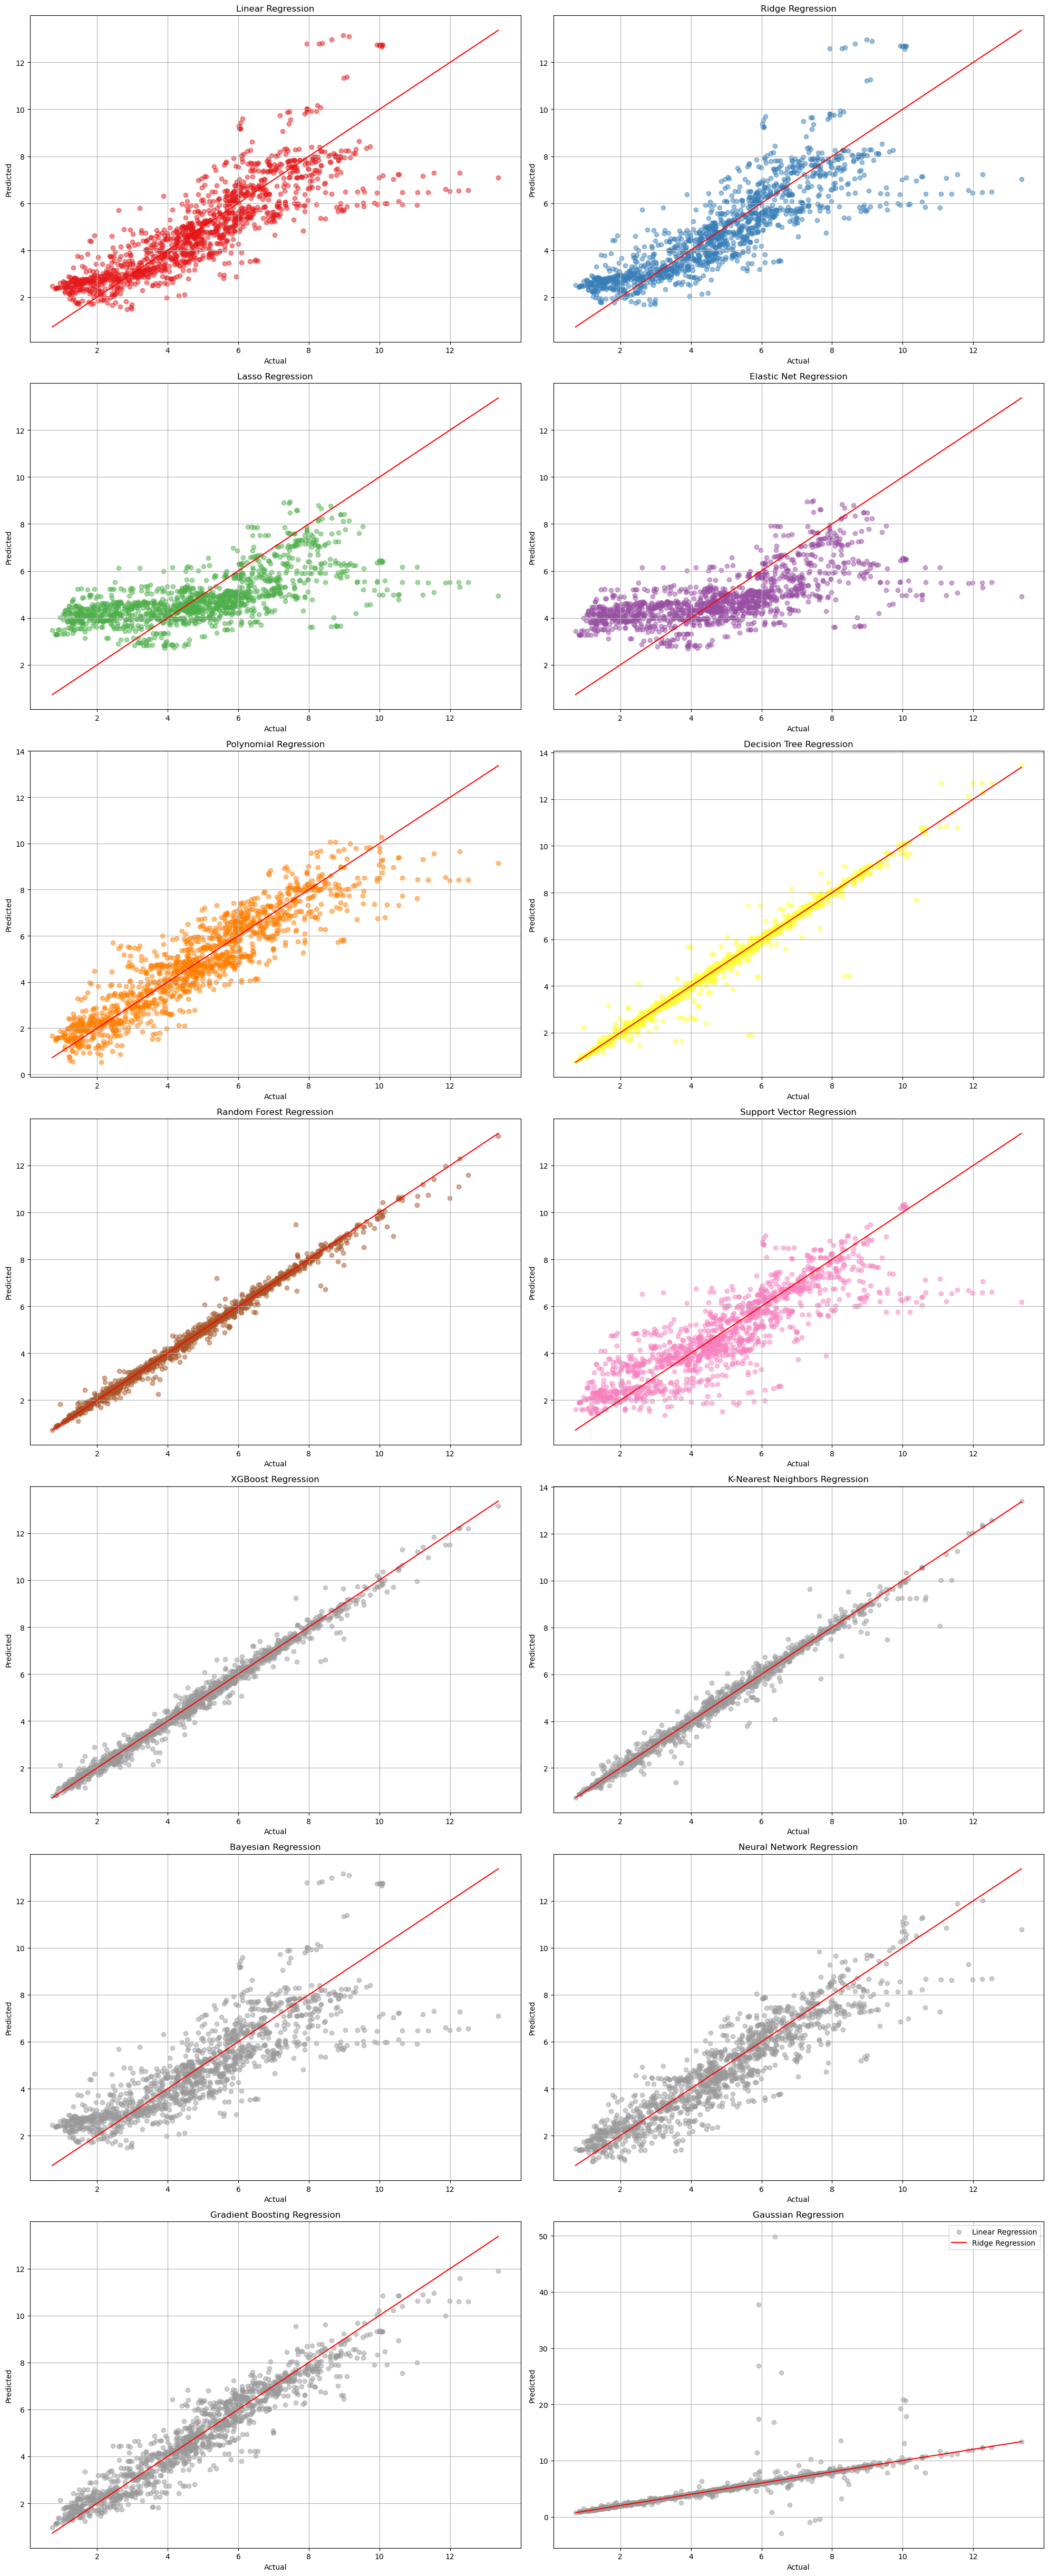

In [79]:
# Create a dictionary to store the model performance
model_performance = {
    'Linear Regression': {'Predicted': linear_y_pred, 'Actual': y_test},
    'Ridge Regression': {'Predicted': ridge_y_pred, 'Actual': y_test},
    'Lasso Regression': {'Predicted': lasso_y_pred, 'Actual': y_test},
    'Elastic Net Regression': {'Predicted': elastic_net_y_pred, 'Actual': y_test},
    'Polynomial Regression': {'Predicted': poly_y_pred, 'Actual': y_test},
    'Decision Tree Regression': {'Predicted': tree_y_pred, 'Actual': y_test},
    'Random Forest Regression': {'Predicted': forest_y_pred, 'Actual': y_test},
    'Support Vector Regression': {'Predicted': svr_y_pred, 'Actual': y_test},
    'XGBoost Regression': {'Predicted': xgb_y_pred, 'Actual': y_test},
    'K-Nearest Neighbors Regression': {'Predicted': knn_y_pred, 'Actual': y_test},
    'Bayesian Regression': {'Predicted': bayesian_y_pred, 'Actual': y_test},
    'Neural Network Regression': {'Predicted': nn_y_pred, 'Actual': y_test},
    'Gradient Boosting Regression': {'Predicted': gb_y_pred, 'Actual': y_test},
    'Gaussian Regression': {'Predicted': gr_y_pred, 'Actual': y_test}
}

# Set up figure and axes
num_models = len(model_performance)
num_rows = (num_models // 2) + (1 if num_models % 2 != 0 else 0)
fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 7))

# Define color palette
color_palette = plt.cm.Set1(range(num_models))

# Iterate over the models and plot the predicted vs actual values
for i, (model, performance) in enumerate(model_performance.items()):
    row = i // 2
    col = i % 2
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Get the predicted and actual values
    y_pred = performance['Predicted']
    y_actual = performance['Actual']

    # Scatter plot of predicted vs actual values
    ax.scatter(y_actual, y_pred, color=color_palette[i], alpha=0.5, marker='o')

    # Add a diagonal line for reference
    ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='r')

    # Set the title and labels
    ax.set_title(model)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

    # Add gridlines
    ax.grid(True)

# Adjust spacing between subplots
fig.tight_layout()

# Create a legend
plt.legend(model_performance.keys(), loc='upper right')

# Show the plot
plt.show()


In [80]:
# Store the regression models and their scores in a dictionary
regression_scores = {
    "Linear Regression":(linear_mse, linear_r2),
    "Ridge Regression": (ridge_mse, ridge_r2),
    "Elastic Net Regression": (elastic_net_mse, elastic_net_r2),
    "Polynomial Regression": (poly_mse, poly_r2),
    "Random Forest Regression": (forest_mse, forest_r2),
    "Gradient Boosting Regression": (gb_mse, gb_r2),
    "Decision Tree Regression": (tree_mse, tree_r2),
    "Lasso Regression": (lasso_mse, lasso_r2),
    "Support Vector Regression": (svr_mse, svr_r2),
    "XGBoost Regression": (xgb_mse, xgb_r2),
    "K-Nearest Neighbors Regression": (knn_mse, knn_r2),
    "Bayesian Regression": (bayesian_mse, bayesian_r2),
    "Neural Network Regression": (nn_mse, nn_r2),
    "Gaussian Regression": (gr_mse,gr_r2),
}

# Sort the regression models based on MSE in ascending order and R-squared score in descending order
sorted_models = sorted(regression_scores.items(), key=lambda x: (x[1][0], -x[1][1]))

print("Regression Models in Order of Precision:")
for i, (model, scores) in enumerate(sorted_models, start=1):
    print(f"{i}. {model}")
    print("   Mean Squared Error (MSE):", scores[0])
    print("   R-squared Score:", scores[1])
    print()

most_precise_model = sorted_models[0][0]
least_precise_model = sorted_models[-1][0]

print(f"The most precise model is: {most_precise_model}")
print(f"The least precise model is: {least_precise_model}")

Regression Models in Order of Precision:
1. Random Forest Regression
   Mean Squared Error (MSE): 0.04777818088558513
   R-squared Score: 0.9906071650844268

2. XGBoost Regression
   Mean Squared Error (MSE): 0.07191256743799192
   R-squared Score: 0.9858625242363743

3. K-Nearest Neighbors Regression
   Mean Squared Error (MSE): 0.08573514146671343
   R-squared Score: 0.9831451090155859

4. Decision Tree Regression
   Mean Squared Error (MSE): 0.12251795218529872
   R-squared Score: 0.9759138820746145

5. Gradient Boosting Regression
   Mean Squared Error (MSE): 0.41874836511866265
   R-squared Score: 0.9176771867027602

6. Neural Network Regression
   Mean Squared Error (MSE): 0.7545158917032653
   R-squared Score: 0.851667788924055

7. Polynomial Regression
   Mean Squared Error (MSE): 0.8428057671756513
   R-squared Score: 0.8343106562401098

8. Support Vector Regression
   Mean Squared Error (MSE): 1.4747596332156852
   R-squared Score: 0.7100732276074266

9. Linear Regression
   